In [1]:
# 에브리타임 자취하숙 크롤링
# ------------------2024-08-05
# -----------------made by 서연

In [2]:
import pandas as pd
import time

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pyperclip
import time

In [5]:
driver = webdriver.Chrome()

In [6]:
driver.get("https://everytime.kr/388123")

In [9]:
time.sleep(5)

loginId = ''
pyperclip.copy(loginId)
id_ = driver.find_element(By.XPATH, '/html/body/div[1]/div/form/div[1]/input[1]')
id_.send_keys(Keys.CONTROL + 'v')

time.sleep(5)

loginpw = ''
pyperclip.copy(loginpw)
pw_ = driver.find_element(By.XPATH, '/html/body/div[1]/div/form/div[1]/input[2]')
pw_.send_keys(Keys.CONTROL + 'v')

In [11]:
soup = bs(driver.page_source, 'lxml')

In [18]:
url_list = []
title_list = []
content_list = []

for page in range(1, 51):
    url = 'https://everytime.kr/388123/p/{}'.format(page)
    driver.get(url)

    time.sleep(1)

    soup = bs(driver.page_source, 'lxml')

    titles = soup.select('h2.medium.bold')
    
    for i in titles:
        title_list.append(i.text)

    contents = soup.select('p.medium')
        
    for i in contents:
        content_list.append(i.text)

In [19]:
len(title_list), len(content_list)

(1000, 1000)

In [20]:
data = {'제목' : title_list, "내용" : content_list}

In [21]:
everytime = pd.DataFrame(data)

In [22]:
everytime

,제목,내용
0,송이들,과일 어디서 사먹어? 럭키는 과일이나 야채 상태 안좋아서 아예 안가고 매번 서울역 ...
1,1캠쪽에 천둥소리,나만 들려? 무슨 소리지
2,팽이버섯 판매,750그램 한봉지에 2500원으로 판매합니다!2봉있어요 😀 직거래로 거래하겠습니다~~
3,김밥집 국물 내는법,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...
4,혐주의) 변기 곰팡이,밖에 조금 오래 외출하고 돌아오면 (4-7일) 변기 안이 이렇게 되던데 이유 아는 ...
...,...,...
995,비와서 집에 박벌,나올까봐 진심 무서움 ㄷㄷㄷ
996,문,살살 여닫아라 건물 부술 일 있나
997,공덕쪽에서 자취하는 송들,이런글 안되면 말해줘..!....bhc 공덕 지점 어때 맛있어? 뿌링클시키려는데!
998,초파리 제거,잘되는 약 추천좀요………아 매일마다 에프킬라 뿌리니까 내 폐 고장날거같아


In [23]:
from konlpy.tag import Okt
okt = Okt()

In [45]:
stopwords = ['있다', '되다', '하다', '나', '는', '은', '이', '가', '을', '를', '에', '에서', 
             '에게', '한테', '과', '와', '아', '랑', '으로', '로', '께서', '이나', '이라', '이야', 
             '인가', '이야말로', '그리고', '그런데', '그래서', '그래도', '그러나', '그럼에도', '그러면', 
             '그러니까', '그러므로', '그러니까', '그렇게', '그렇지만', '그렇다면', '아니면', '아니라', 
             '그런', '이런', '그렇지', '그래', '저런', '이러한', '그러한', '저러한', '어떤', '이따', 
             '이래', '이렇게', '저렇게', '그따', '그래서', '아무', '전부', '가지', '갖고', '몇', 
             '무슨', '어느', '몇몇', '어떤', '어떻게', '어떤', '아무', '나', '우리', '당신', '자기', 
             '그녀', '저희', '하다', '되다', '않다', '없다', '있다', '되어다', '하고', '그러면', 
             '그래서', '이렇게', '저렇게', '요즘', '그것', '이것', '저것', '있다고', '그렇지만', '그래도'
            '코웨이', '안녕하세요', '웅진코웨이', '\u200b', '이다', '안녕하다', '아니다', '같다', '거', '것']

In [46]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb'] if word not in stopwords ]
    return words

In [47]:
# 추출된 단어들을 저장할 리스트
extracted_words_list = []

# cleaned_contents_list에 있는 각 텍스트에 대해 okt_pos_tagging 함수 호출하여 추출된 단어들을 리스트에 저장
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# 저장된 추출된 단어들 리스트 출력
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f"추출된 단어들: {extracted_words}")
    print()

추출된 단어들: ['과일', '사먹다', '럭키', '과일', '야채', '상태', '안좋다', '아예', '가다', '매번', '서울역', '롯데', '마트', '가다', '덥다', '걸다', '기', '힘들다', '비싸다', '배달', '답']

추출된 단어들: ['들다', '소리']

추출된 단어들: ['그램', '봉지', '판매', '봉', '직거래', '거래']

추출된 단어들: ['팔팔', '끓다', '물', '숟갈', '넣다', '단점', '양', '많다', '본인', '음식점', '유통', '내', '먹다']

추출된 단어들: ['조금', '외출', '돌아오다', '변기', '안이', '이유', '알다', '송이', '그냥', '청소', '답']

추출된 단어들: ['복도', '나방', '치우다', '달라', '연락', '드리다', '안되다', '집', '들어오다', '문', '바로', '옆']

추출된 단어들: ['어제', '집', '나오다', '벌랜데', '뭐', '알다', '송']

추출된 단어들: ['환기', '시키다', '때', '자꾸', '무시무시하다', '벌레', '창문', '틈', '방충', '망', '틈', '들어오다', '환기', '시키다', '싶다']

추출된 단어들: ['오피스텔', '살다', '송들', '혹시', '싱크대', '하부', '냄새', '사람']

추출된 단어들: ['집', '개월', '정도', '살다', '이번', '주', '창문', '열다', '본가', '다녀오다', '집', '곰팡이', '가득', '생기다', '심지어', '물건', '정도', '집주인', '해결', '해주다']

추출된 단어들: ['하숙', '에어컨', '켜', '방']

추출된 단어들: ['작고', '문', '열다', '닫다', '때', '소리', '고오', '돼다', '냄새', '나다', '빼다', '돼다', '집주인', '연락', '해보다']

추출된 단어들: ['충', '파동']

추출된 단어들: ['도서관', '후문', '의류수거함

In [48]:
data = {"제목" : title_list, "내용" : cleaned_contents_list, "추출된 단어" : extracted_words_list}

In [49]:
everytime_df = pd.DataFrame(data)

In [50]:
everytime_df

,제목,내용,추출된 단어
0,송이들,과일 어디서 사먹어? 럭키는 과일이나 야채 상태 안좋아서 아예 안가고 매번 서울역 ...,"[과일, 사먹다, 럭키, 과일, 야채, 상태, 안좋다, 아예, 가다, 매번, 서울역..."
1,1캠쪽에 천둥소리,나만 들려? 무슨 소리지,"[들다, 소리]"
2,팽이버섯 판매,750그램 한봉지에 2500원으로 판매합니다!2봉있어요 😀 직거래로 거래하겠습니다~~,"[그램, 봉지, 판매, 봉, 직거래, 거래]"
3,김밥집 국물 내는법,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...,"[팔팔, 끓다, 물, 숟갈, 넣다, 단점, 양, 많다, 본인, 음식점, 유통, 내,..."
4,혐주의) 변기 곰팡이,밖에 조금 오래 외출하고 돌아오면 (4-7일) 변기 안이 이렇게 되던데 이유 아는 ...,"[조금, 외출, 돌아오다, 변기, 안이, 이유, 알다, 송이, 그냥, 청소, 답]"
...,...,...,...
995,비와서 집에 박벌,나올까봐 진심 무서움 ㄷㄷㄷ,"[나오다, 진심, 무서움]"
996,문,살살 여닫아라 건물 부술 일 있나,"[살살, 여, 닫다, 건물, 부술, 일]"
997,공덕쪽에서 자취하는 송들,이런글 안되면 말해줘..!....bhc 공덕 지점 어때 맛있어? 뿌링클시키려는데!,"[글, 안되다, 말, 해주다, 공덕, 지점, 어떻다, 맛있다, 뿌, 링클, 시키다]"
998,초파리 제거,잘되는 약 추천좀요………아 매일마다 에프킬라 뿌리니까 내 폐 고장날거같아,"[약, 추천, 좀, 매일, 에프킬라, 뿌리, 내, 폐, 고장, 날다]"


In [51]:
# 피클 파일로 저장
pickle_file = 'everytime_df.pkl'
everytime_df.to_pickle(pickle_file)

In [52]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [53]:
count_list = []

for words in extracted_words_list:
    count  = Counter(words)
    count.most_common(100) 
    count_list.append(count)

In [54]:
count_list

[Counter({'과일': 2,
          '가다': 2,
          '사먹다': 1,
          '럭키': 1,
          '야채': 1,
          '상태': 1,
          '안좋다': 1,
          '아예': 1,
          '매번': 1,
          '서울역': 1,
          '롯데': 1,
          '마트': 1,
          '덥다': 1,
          '걸다': 1,
          '기': 1,
          '힘들다': 1,
          '비싸다': 1,
          '배달': 1,
          '답': 1}),
 Counter({'들다': 1, '소리': 1}),
 Counter({'그램': 1, '봉지': 1, '판매': 1, '봉': 1, '직거래': 1, '거래': 1}),
 Counter({'팔팔': 1,
          '끓다': 1,
          '물': 1,
          '숟갈': 1,
          '넣다': 1,
          '단점': 1,
          '양': 1,
          '많다': 1,
          '본인': 1,
          '음식점': 1,
          '유통': 1,
          '내': 1,
          '먹다': 1}),
 Counter({'조금': 1,
          '외출': 1,
          '돌아오다': 1,
          '변기': 1,
          '안이': 1,
          '이유': 1,
          '알다': 1,
          '송이': 1,
          '그냥': 1,
          '청소': 1,
          '답': 1}),
 Counter({'복도': 1,
          '나방': 1,
          '치우다': 1,
          '달라': 1,
  

In [55]:
# 모든 Counter 객체를 합치기
total_counter = Counter()
for counter in count_list:
    total_counter += counter

In [56]:
total_counter

Counter({'집': 157,
         '송이': 111,
         '보다': 109,
         '나오다': 104,
         '개': 92,
         '바퀴': 83,
         '벌레': 82,
         '내': 77,
         '살다': 73,
         '진짜': 70,
         '자취': 69,
         '어떻다': 69,
         '알다': 68,
         '안': 68,
         '해주다': 67,
         '오다': 66,
         '좋다': 64,
         '혹시': 63,
         '방': 63,
         '사람': 61,
         '좀': 61,
         '가다': 60,
         '들다': 59,
         '먹다': 59,
         '때': 58,
         '정도': 58,
         '학교': 56,
         '수': 56,
         '들어오다': 55,
         '싶다': 53,
         '자다': 53,
         '추천': 52,
         '받다': 49,
         '근처': 48,
         '뭐': 47,
         '크다': 45,
         '버리다': 44,
         '두다': 44,
         '그렇다': 44,
         '오늘': 44,
         '지금': 44,
         '화장실': 43,
         '살': 43,
         '모르다': 42,
         '돼다': 41,
         '소리': 40,
         '더': 40,
         '해': 38,
         '그냥': 37,
         '많다': 36,
         '곳': 36,
         '잡다': 36,
         '가능

<function matplotlib.pyplot.show(close=None, block=None)>

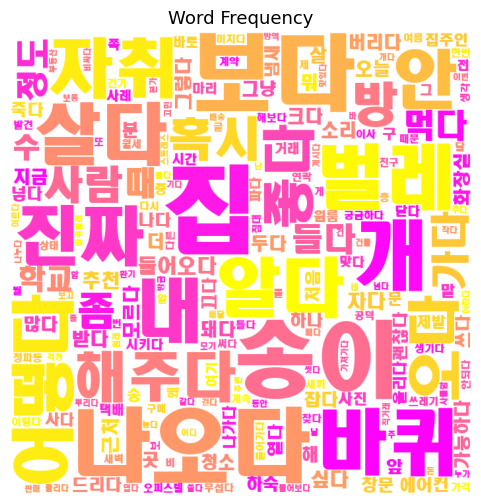

In [57]:
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = "'C:\Windows\Fonts\HMKMRHD.TTF"

# WordCloud 객체 생성
wordcloud = WordCloud(font_path=font_path,
                      width=700, 
                      height=700, 
                      background_color='white',
                      colormap='spring',
                      random_state=1).generate_from_frequencies(total_counter)

# 시각화
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13) 
plt.show